# Sort candidate pulse sequences

In [1]:
import sys
import os
import re
import pandas as pd

In [13]:
candidates = []
with open('../../data/2021-02/20210205-102100/candidates.txt') as file:
    for line in file:
        candidates.append(line)

In [14]:
c2 = []
for c in candidates:
    try:
        m = re.search(r'(.*?) candidate pulse sequence from \d+ \((.*?), array\((.*?)\), (.*?)\)\n', c)
        c2.append({
            'timestamp': m.group(1),
            'sequence': m.group(2),
            'last_pulse': m.group(3),
            'value': float(m.group(4))
        })
    except Exception as e:
        print(c)

In [15]:
len(c2)

1895

In [16]:
df = pd.DataFrame(c2)

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

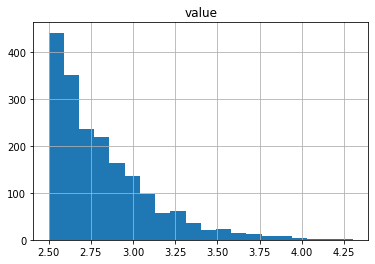

In [17]:
df.hist('value', bins=20)

In [18]:
df

,timestamp,sequence,last_pulse,value
0,2021-02-05 10:32:36.019805,"[4, 1, 3, 2, 3, 0, 2, 2, 1, 0, 2, 4, 2, 4, 2, ...","[0., 0., 0., 0., 1.]",2.545065
1,2021-02-05 10:35:05.539849,"[3, 4, 4, 0, 4, 3, 3, 2, 4, 3, 1, 0, 3, 0, 3, ...","[0., 0., 1., 0., 0.]",2.558061
2,2021-02-05 10:37:15.995386,"[4, 0, 1, 0, 1, 4, 3, 3, 2, 0, 1, 3, 0, 1, 1, ...","[0., 1., 0., 0., 0.]",2.501602
3,2021-02-05 10:53:01.729772,"[4, 3, 2, 4, 2, 2, 4, 4, 0, 4, 1, 3, 0, 4, 4, ...","[0., 0., 1., 0., 0.]",2.607544
4,2021-02-05 10:54:01.976105,"[2, 1, 2, 2, 0, 0, 0, 3, 1, 2, 2, 3, 3, 1, 1, ...","[0., 0., 0., 0., 1.]",2.620393
...,...,...,...,...
1890,2021-02-06 10:16:58.108566,"[2, 4, 0, 3, 0, 2, 2, 3, 2, 2, 1, 2, 3, 3, 3, ...","[0., 0., 0., 0., 1.]",2.587999
1891,2021-02-06 10:17:30.748548,"[2, 3, 3, 3, 2, 4, 2, 3, 3, 2, 3, 3, 2, 4, 4, ...","[1., 0., 0., 0., 0.]",2.640224
1892,2021-02-06 10:18:14.508508,"[2, 3, 3, 3, 2, 4, 2, 3, 3, 2, 3, 2, 1, 2, 3, ...","[0., 0., 1., 0., 0.]",3.170484
1893,2021-02-06 10:18:35.021709,"[2, 3, 3, 3, 2, 0, 2, 2, 3, 3, 3, 2, 4, 3, 2, ...","[1., 0., 0., 0., 0.]",2.773576


In [19]:
df.sort_values('value', ascending=False, inplace=True)

In [20]:
df

,timestamp,sequence,last_pulse,value
1885,2021-02-06 10:14:00.514291,"[2, 3, 3, 3, 1, 4, 2, 0, 4, 4, 2, 3, 3, 2, 4, ...","[0., 1., 0., 0., 0.]",4.301602
996,2021-02-06 03:58:54.175875,"[2, 3, 3, 3, 2, 4, 2, 2, 3, 3, 2, 2, 3, 2, 3, ...","[0., 0., 1., 0., 0.]",4.210711
48,2021-02-05 15:50:29.778683,"[3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 4, ...","[1., 0., 0., 0., 0.]",4.121513
1027,2021-02-06 04:13:44.289922,"[2, 4, 3, 2, 3, 0, 2, 2, 3, 0, 3, 3, 2, 3, 2, ...","[0., 0., 1., 0., 0.]",4.099934
1384,2021-02-06 06:48:37.146042,"[2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, ...","[1., 0., 0., 0., 0.]",3.986736
...,...,...,...,...
339,2021-02-05 21:41:07.395625,"[2, 3, 2, 3, 2, 4, 4, 2, 1, 3, 4, 2, 2, 4, 3, ...","[1., 0., 0., 0., 0.]",2.500572
1065,2021-02-06 04:34:29.718069,"[2, 3, 3, 2, 0, 3, 3, 3, 1, 1, 2, 2, 2, 2, 3, ...","[1., 0., 0., 0., 0.]",2.500474
485,2021-02-05 23:36:31.875664,"[2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, ...","[1., 0., 0., 0., 0.]",2.500245
1037,2021-02-06 04:17:18.643701,"[2, 3, 3, 2, 4, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, ...","[0., 1., 0., 0., 0.]",2.500135


In [21]:
df.to_csv('../../data/2021-02/20210205-102100/candidates_sorted.csv')